# k-Nearest Neighbors

K-nearest neighbors (KNN) is a type of supervised learning algorithm which is used for both regression and classification purposes, but mostly it is used for the later. Given a dataset with different classes, KNN tries to predict the correct class of test data by calculating the distance between the test data and all the training points. It then selects the k points which are closest to the test data.  Once the points are selected, the algorithm calculates the probability (in case of classification) of the test point belonging to the classes of the k training points and the class with the highest probability is selected. In the case of a regression problem, the predicted value is the mean of the k selected training points.


Let’s understand this with an illustration:


1)Given a training dataset as given below. We have a new test data that we need to assign to one of the two classes.

<img src="1.png" width="">
                                      

2)Now, the k-NN algorithm calculates the distance between the test data and the given training data.

<img src="2.png" width="">

                                                        
3)After calculating the distance, it will select the k training points which are nearest to the test data. Let’s assume the value of k is 3 for our example.

<img src="3.png" width="">                                            


4)Now, 3 nearest neighbors are selected, as shown in the figure above. Let’s see in which class our test data will be assigned :

Number of Green class values = 2
Number of Red class values = 1
Probability(Green) = 2/3
Probability(Red) = 1/3

Since the probability for Green class is higher than Red, the k-NN algorithm will assign the test data to the Green class.

Similarly, if this were the case of a regression problem, the predicted value for the test data will simply be the mean of all the 3 nearest values.

This is the basic working algorithm for k-NN. Let’s understand how the distance is calculated :

### Euclidean Distance: 

It is the most commonly used method to calculate the distance between two points.
The Euclidean distance between two points ‘p(p1,p2)’ and ‘q(q1,q2)’ is calculated  as :

<img src="4.png" width="">       image source : Wikipedia

<img src="5.png" width="">

                                          
Similarly,for n-dimensional space, the Euclidean distance is given as :

<img src="6.png" width="">
 
### Hamming distance
A/c to Wikipedia, hamming distance is a distance metric that measures the number of mismatches between two vectors. It is mostly used in the case of categorical data.

<img src="7.png" width="">
                                                               
Generally, if we have features as categorical data then we consider the difference to be 0 if both the values are the same and the difference is 1 if both the values are different.

### Manhattan Distance
A/c to Wikipedia, The Manhattan distance, also known as L1 norm, Taxicab norm, Rectilinear distance or City block distance. This distance represents the sum of the absolute differences between the opposite values in vectors.

<img src="8.png" width="">
                                                           
Manhattan Distance is less influenced by outliers than the Euclidean distance. With very high dimensional data it is more preferred. 

### Lazy Learners

k-NN algorithms are often termed as Lazy learners. Let’s understand why is that. Most of the algorithms like Bayesian classification, logistic regression, SVM etc., are called Eager learners. These algorithms generalize over the training set before receiving the test data i.e. they create a model based on the training data before receiving the test data and then do the prediction/classification on the test data.
But this is not the case with the k-NN algorithm. It doesn’t create a generalized model for the training set but waits for the test data. Once test data is provided then only it starts generalizing the training data to classify the test data.  So, a lazy learner just stores the training data and waits for the test set. Such algorithms work less while training and more while classifying a given test dataset.

### Weighted Nearest Neighbor
In weighted k-NN, we assign weights to the k nearest neighbors.The weights are typically assigned on the basis of distance.
Sometimes rest of data points are assigned a weight of 0 also. The main intuition is that the points in neighbor should have more weights than father points.



### Choosing the value of k
The value of k affects the k-NN classifier drastically. The flexibility of the model decreases with the increase of ‘k’.  With lower value of ‘k’ variance is high and bias is low but as we increase the value of ‘k’ variance starts decreasing and bias starts increasing. With very low values of ‘k’ there is a chance of algorithm overfitting the data whereas with very high value of ‘k’ there is a chance of underfitting. 
Let’s visualize the trade-off between ‘1/k’, train error rate and test error rate:

<img src="9.png" width="">  image source: “ISLR”

We can clearly see that the train error rate increases with the increase in the value of ‘k’ whereas test error rate decreases initially and then increases again.  So, our goal should be to choose such value of ‘k’ for which we get a minimum of both the errors and avoid overfitting as well as underfitting.
We use different ways to calculate the optimum value of ‘k’ such as cross validation, error versus k curve, checking accuracy for each value of ‘k’ etc. 

### Pros and Cons of k-NN Algorithm

Pros:
*It can be used for both regression and classification problems.
*It is very simple and easy to implement.
*Mathematics behind the algorithm is easy to understand.
*There is no need to create model or do hyperparameter tuning.
*   KNN doesn't make any assumption for the distribution of the given data.
*   There is not much time cost in training phase.

Cons:
* Finding the optimum value of ‘k’
* It takes a lot of time to compute the distance between each test sample and all training samples.
* Since the model is not saved beforehand in this algorithm (lazy learner), so every time one predicts a test value, it follows the same steps again and again. 
* Since, we need to store the whole training set for every test set, it requires a lot of space.
* It is not suitable for high dimensional data.
*   Expensive in testing phase




In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ML_df.csv')
df.head()

,carat,depth,table,x,y,z,Good,Ideal,Premium,Very Good,...,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,price
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,0,1,0,0,...,0,0,0,0,1,0,0,0,0,326
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,0,0,1,0,...,0,0,0,1,0,0,0,0,0,326
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,1,0,0,0,...,0,0,0,0,0,1,0,0,0,327
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,0,0,1,0,...,1,0,0,0,0,0,1,0,0,334
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,1,0,0,0,...,0,1,0,0,1,0,0,0,0,335


In [3]:
X = df.drop('price',axis=1)
y = df.price

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [8]:
knn.score(x_train,y_train)

0.9716283638491973

In [8]:
knn.score(x_test,y_test)

0.9535490803744487

#### Residual Analysis on training data

In [10]:
y_pred_train = knn.predict(x_train)
residual = y_train - y_pred_train

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

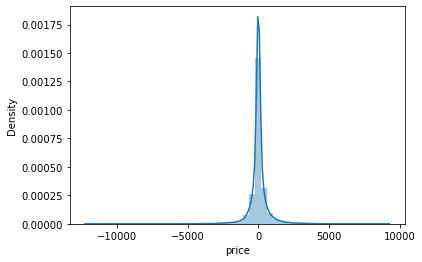

In [11]:
import seaborn as sns
sns.distplot(residual)

#### Residual Analysis on test data

In [12]:
y_pred = knn.predict(x_test)
residual = y_test - y_pred

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

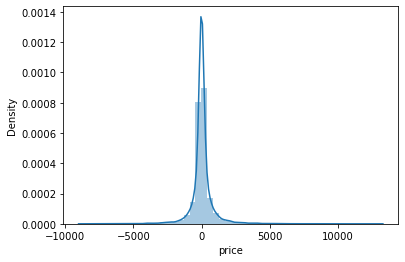

In [13]:
sns.distplot(residual)

In [9]:
param_grid ={
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [11]:
rand_search = RandomizedSearchCV(estimator=knn,param_distributions=param_grid,cv=5,n_jobs=-1,verbose=3,random_state=33)
rand_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 7, 9],
                                        'weights': ['uniform', 'distance']},
                   random_state=33, verbose=3)

In [12]:
rand_search.best_params_

{'weights': 'distance', 'n_neighbors': 7, 'algorithm': 'auto'}

In [13]:
best_param_grid = rand_search.best_estimator_

In [14]:
y_pred = best_param_grid.predict(x_test)

In [15]:
rand_search.score(x_train,y_train)

0.9999948915466406

In [16]:
rand_search.score(x_test,y_test)

0.9587662557920171

In [17]:
import pickle

In [18]:
filename = 'knn.pickle'
pickle.dump(rand_search,open(filename,'wb'))